In [1]:
from datetime import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from pathlib import Path
import shap
import sys

from etl_tsc import load_data
from utility import parse_config

paths = "/proj/hajaalin/Projects/n_track_ML/scripts/tsc/paths.yml"
paths = parse_config(paths)
    
# add InceptionTime source to Python path
src_inceptiontime = paths["src"]["inceptiontime"]
sys.path.insert(1, src_inceptiontime)
from cv_inceptiontime import inceptiontime_cv_repeat

# read the data 
data_dir = paths["data"]["dir"]
raw_data_file = paths["data"]["raw_data_file"]
data = load_data(Path(data_dir) / raw_data_file)

# parameters
fset = "f_dxy_mindist_angle_area"
kernel_size = 20
epochs = 20
max_repeats = 100
job_name = "shap_inceptiontime"
job_id = "1"
now = datetime.now().strftime("%Y%m%d%H%M%S")

# output folders
output_shap = Path(paths["output"]["shap"]) / job_name / now
output_shap.mkdir(parents=True, exist_ok=True)
output_it = Path(paths["output"]["it"]) / job_id
output_it.mkdir(parents=True, exist_ok=True)
output_it = str(output_it) + "/"


model_eval = inceptiontime_cv_repeat(data, output_it, fset, kernel_size=kernel_size, epochs=epochs, repeats=max_repeats, job_id=job_id, return_model_eval=True)

model, feature_names, shap_values_deep, shap_values_grad, X_test, pred, truth = model_eval

shap_values = shap_values_deep


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-je4xnfjy because the default path (/home/hajaalin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/proj/hajaalin/Miniconda3/4.11.0/envs/tsc_jupyter_shap/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future vers

1.0.2
0.10.1
Index(['dxy', 'serum_conc_percent', 'file', 'min_dist_pxs', 'angle', 'dangle',
       'area_micron'],
      dtype='object')
Index(['dxy', 'min_dist_pxs', 'angle', 'dangle', 'area_micron'], dtype='object')
repeat: 1/100


2022-10-20 15:35:35.502315: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.6212121212121212
0.9014084507042254
0.9594594594594594
0.8974358974358975
repeat: 2/100
0.5074626865671642
0.9210526315789473
0.9857142857142858
sufficiently accurate model found


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


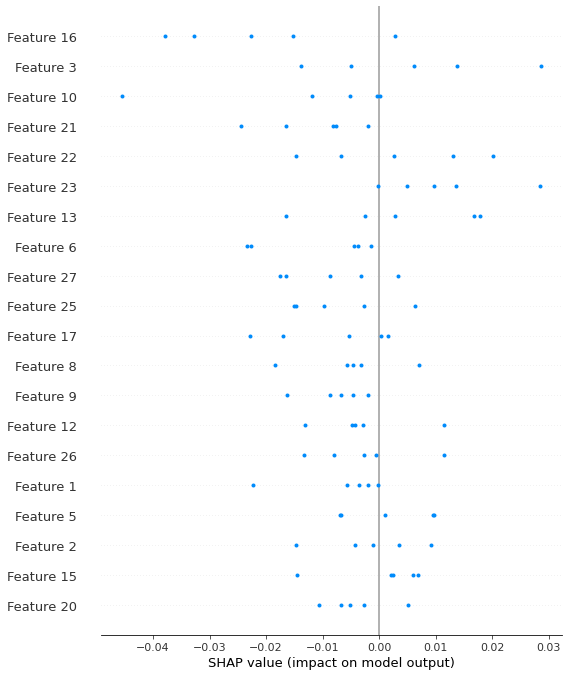

In [2]:
%matplotlib inline
shap.summary_plot(shap_values[0][0])


In [9]:
print(X_test.shape)
print(X_test[0].shape)
print(X_test[0][0].shape)
print(feature_names[0])
print(feature_names)

(71, 5, 28)
(5, 28)
(28,)
dxy
Index(['dxy', 'min_dist_pxs', 'angle', 'dangle', 'area_micron'], dtype='object')


In [3]:
print(len(shap_values)) # model outputs (number of classes)
print(shap_values[0].shape) # samples
print(shap_values[0][0].shape) # features
print(shap_values[0][0][0].shape) # time points


2
(71, 5, 28)
(5, 28)
(28,)


(70, 5)


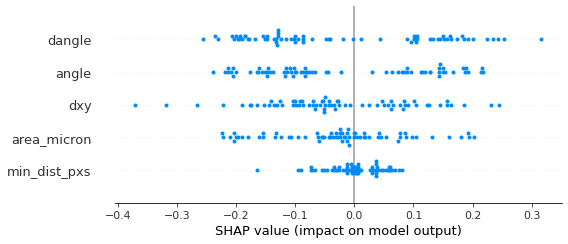

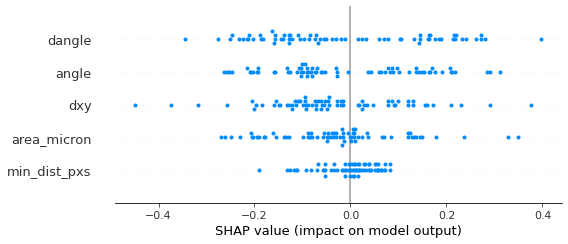

In [3]:
%matplotlib inline
shap_sums_time_d = np.sum(shap_values_deep[0], axis=(2))
shap_sums_time_g = np.sum(shap_values_grad[0], axis=(2))
print(shap_sums_time_d.shape)
shap.summary_plot(shap_sums_time_d, feature_names.values)
shap.summary_plot(shap_sums_time_g, feature_names.values)


In [8]:
shap_values[0][0][0]

array([ 0.00139825,  0.00156945,  0.00095633, -0.0035593 , -0.00065356,
       -0.00566545,  0.00069741, -0.00645106,  0.00193227, -0.00944612,
       -0.02073962, -0.00354027, -0.00046419, -0.00545284, -0.00157776,
       -0.00100791, -0.01035077, -0.00368446, -0.00560924,  0.00231951,
        0.00115578,  0.00414148,  0.00010631, -0.00121166, -0.00410911,
        0.00656016,  0.0018832 , -0.01443229])

In [9]:
shap_sample_sums = np.sum(shap_values[0], axis=(1,2))
print(shap_sample_sums.shape)
print(shap_sample_sums)


(72,)
[-0.45179756 -0.45179352  0.54819823  0.54818346 -0.45143111 -0.45146802
  0.54801441  0.54820136  0.54811527  0.54011754 -0.4484815  -0.4517985
  0.54809317  0.54766811 -0.45168255 -0.40270858 -0.45122493 -0.4233137
 -0.45175648 -0.45178241  0.54807874  0.54428292  0.54820079  0.5478256
  0.54753399  0.54801736 -0.45099013 -0.45169022 -0.45179323 -0.45018786
 -0.45069281 -0.40353229 -0.45178983 -0.44786801 -0.45162302 -0.45156492
  0.54807776  0.54820127 -0.38723696  0.54558001 -0.45144156 -0.45179858
  0.52865562  0.43954148  0.54774664 -0.45177245 -0.43007389  0.54819242
  0.54819848  0.54820133  0.54793463 -0.41178654 -0.45117995  0.54820121
 -0.44645441 -0.43304526  0.5463271   0.54820129 -0.45151858 -0.4112338
  0.54494641  0.39102827  0.54820045  0.54725906 -0.45162979 -0.43557243
  0.54818824  0.54815547  0.54760493  0.54801498  0.54817656  0.54820118]


In [10]:
pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0])

In [11]:
truth

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0])

In [12]:
import numpy as np
mask0 = (truth==0) & (pred==0)
mask1 = (truth==1) & (pred==1)
mask0i = np.array(mask0).astype(int)
mask1i = np.array(mask1).astype(int)
print(mask0)
print(mask1)

[False False  True  True False False  True  True  True  True False False
  True  True False False False False False False  True  True  True  True
  True  True False False False False False False False False False False
  True  True False  True False False  True  True  True False False  True
  True  True  True False False  True False False  True  True False False
  True  True  True  True False False  True  True  True  True  True  True]
[ True  True False False  True  True False False False False  True  True
 False False  True  True  True  True  True  True False False False False
 False False  True  True  True  True  True  True  True  True  True  True
 False False False False  True  True False False False  True  True False
 False False False  True  True False  True  True False False  True  True
 False False False False  True  True False False False False False False]


In [13]:
# 0 seems to represent positive values, 1 negative values
# pick most positive and most negative samples
sample0 = np.argmax(shap_sample_sums * mask0i)
sample1 = np.argmin(shap_sample_sums * mask1i)

print(sample0)
print(sample1)
print(shap_sample_sums[sample0])
print(shap_sample_sums[sample1])
print(sum(sum(shap_values[0][sample0]))) 
print(sum(sum(shap_values[0][sample1]))) 


7
41
0.5482013574164577
-0.45179857875693646
0.5482013574164578
-0.4517985787569364


In [14]:
shap_sample_sums * mask0i

array([-0.        , -0.        ,  0.54819823,  0.54818346, -0.        ,
       -0.        ,  0.54801441,  0.54820136,  0.54811527,  0.54011754,
       -0.        , -0.        ,  0.54809317,  0.54766811, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.54807874,  0.54428292,  0.54820079,  0.5478256 ,  0.54753399,
        0.54801736, -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.54807776,  0.54820127, -0.        ,  0.54558001,
       -0.        , -0.        ,  0.52865562,  0.43954148,  0.54774664,
       -0.        , -0.        ,  0.54819242,  0.54819848,  0.54820133,
        0.54793463, -0.        , -0.        ,  0.54820121, -0.        ,
       -0.        ,  0.5463271 ,  0.54820129, -0.        , -0.        ,
        0.54494641,  0.39102827,  0.54820045,  0.54725906, -0.        ,
       -0.        ,  0.54818824,  0.54815547,  0.54760493,  0.54

In [15]:
sv = shap_values.copy()

In [16]:
print(shap_values[0].shape)
print(shap_values[0].size)
shap_array = shap_values[0].copy().reshape(shap_values[0].size, 1)
print(shap_array.shape)
print(shap_values[0].shape)

(72, 5, 28)
10080
(10080, 1)
(72, 5, 28)


In [17]:
np.percentile(shap_array, 10)

-0.01011421617968206

In [18]:
np.percentile(shap_array, 90)

0.011717900741730885

In [19]:
shap_values_feature_first = np.transpose(shap_values[0], axes=(1,0,2))
print(shap_values[0].shape)
print(shap_values_feature_first.shape)

(72, 5, 28)
(5, 72, 28)


(72, 28)
(2016, 1)
(72, 28)
(2016, 1)
(72, 28)
(2016, 1)
(72, 28)
(2016, 1)
(72, 28)
(2016, 1)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


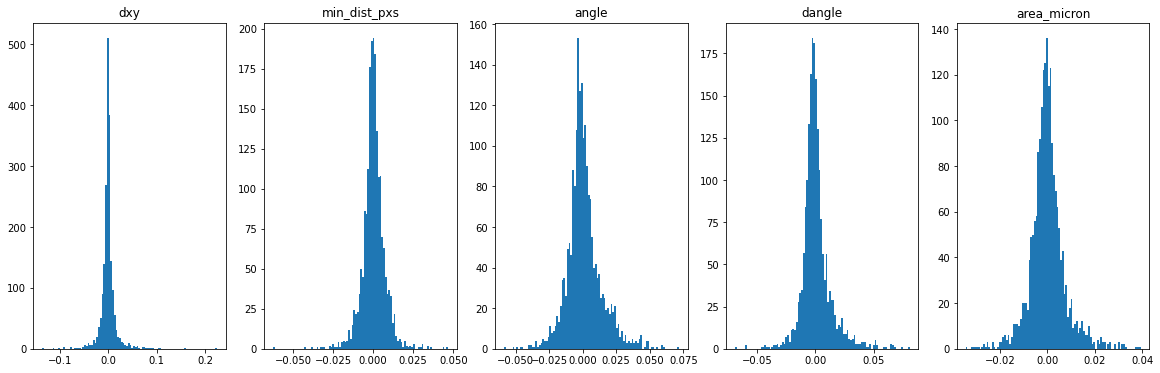

In [20]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,5)
fig.set_size_inches(20,6)
shap_arrays = []
vmin = []
vmax = []
for i in range(5):
    values = shap_values_feature_first[i].copy()
    print(values.shape)
    values = values.reshape(values.size, 1)
    print(values.shape)
    shap_arrays.append(values)
    axs[i].hist(values, bins=100)
    axs[i].set_title(feature_names[i])

shap_arrays_s = []
vmins = []
vmaxs = []
for i in range(shap_values[0].shape[0]):
    values = shap_values[0][i].copy()
    #print(values.shape)
    values = values.reshape(values.size, 1)
    #print(values.shape)
    shap_arrays_s.append(values)


In [21]:
vmins = []
vmaxs = []
for sa in shap_arrays:
    vmins.append(np.percentile(sa, 10))
    vmaxs.append(- np.percentile(sa, 10))
print(vmins)
print(vmaxs)

[-0.012547644780261241, -0.0074450469901285975, -0.0128615164154681, -0.010423140842624534, -0.0077199725924214846]
[0.012547644780261241, 0.0074450469901285975, 0.0128615164154681, 0.010423140842624534, 0.0077199725924214846]


(10080, 1)


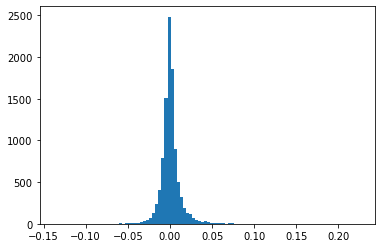

In [22]:
plt.hist(shap_array, bins=100)
print(shap_array.shape)

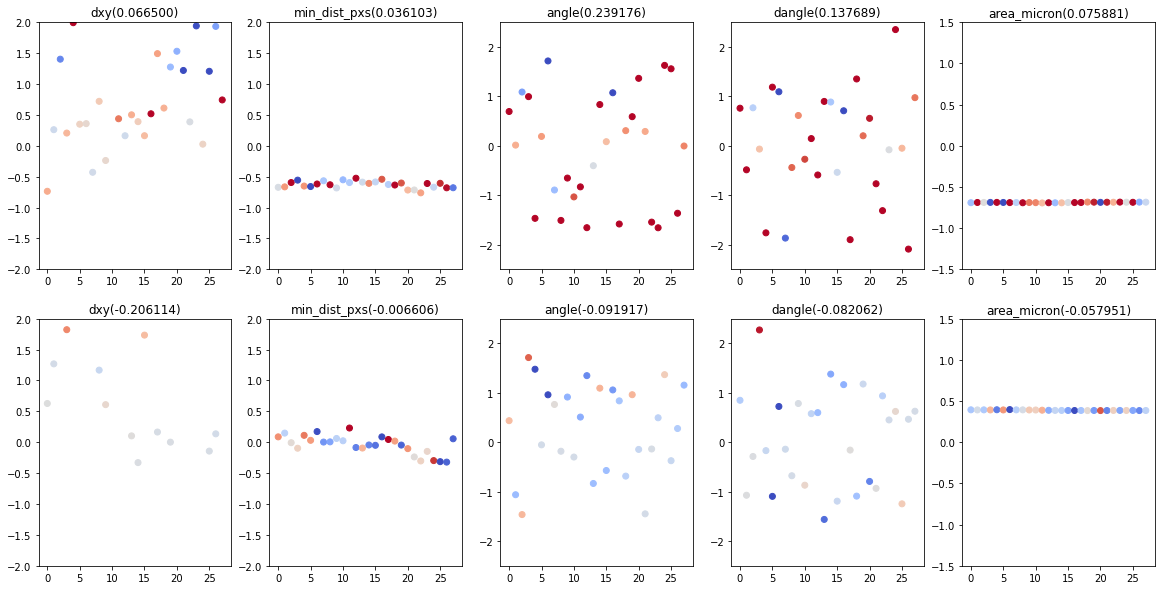

In [49]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2,5)
fig.set_size_inches(20,10)

model_output = 0
time_axis = list(range(shap_values[0].shape[2]))
ymin = [-2, -2, -2.5, -2.5, -1.5]
ymax = [2, 2, 2.5, 2.5, 1.5]

# adjust colormap min/max
#shap_min = -0.02
#shap_max = 0.02

samples = [sample0, sample1]
for s in range(len(samples)):
    #print('sample %d %d' % (s, samples[s]))
    for i in range(5):
        #print(i)
        shap_values_for_feature = shap_values[model_output][samples[s]][i]
        #print(shap_values_for_feature)
        
        # SHAP value limits by feature
        #vmin = vmins[i]
        #vmax = vmaxs[i]
        #print(vmin)
        #print(vmax)
        
        # SHAP value limits by sample
        vmin = np.percentile(shap_values[model_output][samples[s]][i], 5)
        vmax = - vmin
        #vmax = np.percentile(shap_values[model_output][samples[s]][i], 90)
        
        axs[s][i].scatter(time_axis, X_test[samples[s]][i], c=shap_values_for_feature, cmap='coolwarm', vmin=vmin, vmax=vmax)
        shap_feature_sum = sum(shap_values_for_feature)
        axs[s][i].set_title(feature_names[i] + "(%f)" % shap_feature_sum)
        axs[s][i].set_ylim([ymin[i], ymax[i]])


In [39]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,5)
fig.set_size_inches(20,4)

sample = 21
time_axis = list(range(28))
for i in range(5):
    shap_values_for_feature = shap_values[model_output][sample][i]
    axs[i].scatter(time_axis, X_test[sample][i])#, c=shap_values_for_feature, cmap='coolwarm')#, vmin=shap_min, vmax=shap_max)
    shap_feature_sum = sum(shap_values_for_feature)
    axs[i].set_title(feature_names[i] + "(%f)" % shap_feature_sum)
    axs[i].set_ylim([ymin[i], ymax[i]])


In [40]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,5)
fig.set_size_inches(20,4)

sample = 21
time_axis = list(range(28))
for i in range(5):
    #shap_values_for_feature = shap_values[model_output][sample][i]
    axs[i].scatter(time_axis, X_test[sample][i])#, c=shap_values_for_feature, cmap='coolwarm')#, vmin=shap_min, vmax=shap_max)
    #shap_feature_sum = sum(shap_values_for_feature)
    #axs[i].set_title(feature_names[i] + "(%f)" % shap_feature_sum)
    #axs[i].set_ylim([ymin[i], ymax[i]])


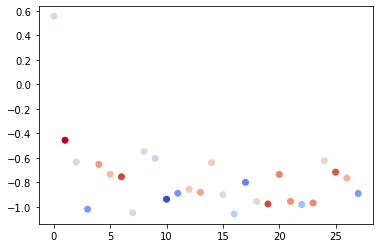

In [25]:
plt.scatter(list(range(28)), X_test[sample0][0], c=shap_values[0][sample0][0], cmap='coolwarm')


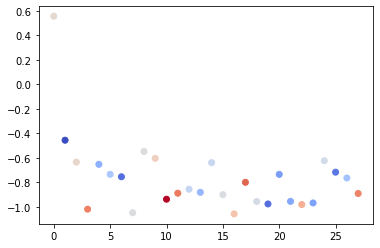

In [27]:
plt.scatter(list(range(28)), X_test[sample0][0], c=shap_values[1][sample0][0], cmap='coolwarm')


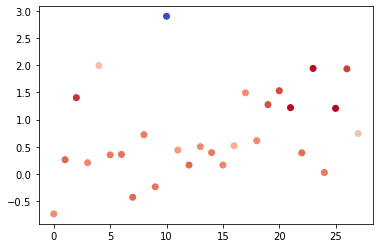

In [43]:
%matplotlib inline
plt.scatter(list(range(28)), X_test[sample0][0], c=shap_values[1][sample0][0], cmap='coolwarm')
#plt.show()